In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [ ]:
users=pd.read_csv('takehome_users.csv',encoding='cp1252')


In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [ ]:
users.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


In [ ]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [ ]:
engagement=pd.read_csv('takehome_user_engagement.csv')


In [ ]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150470 entries, 0 to 150469
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   time_stamp  150470 non-null  object 
 1   user_id     150469 non-null  float64
 2   visited     150469 non-null  float64
dtypes: float64(2), object(1)
memory usage: 3.4+ MB


In [ ]:
engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1.0,1.0
1,2013-11-15 03:45:04,2.0,1.0
2,2013-11-29 03:45:04,2.0,1.0
3,2013-12-09 03:45:04,2.0,1.0
4,2013-12-25 03:45:04,2.0,1.0


In [ ]:
engagement.describe()

,user_id,visited
count,150469.000000,150469.0
mean,4277.374323,1.0
std,2429.366716,0.0
min,1.000000,1.0
25%,2300.000000,1.0
50%,4248.000000,1.0
75%,6282.000000,1.0
max,8679.000000,1.0


In [ ]:
sorted(list(engagement['visited'].unique()))

[1.0, nan]

In [ ]:
print('There are {} unique users of the 207,917 entries in engagement data'\
      .format(len(engagement['user_id'].unique())))

There are 6350 unique users of the 207,917 entries in engagement data


In [ ]:
three_logins = engagement.groupby('user_id').filter(lambda x: len(x) >=3)

In [ ]:
print('There are {} unique users who logged in 3 times or more in total'\
      .format(len(three_logins['user_id'].unique())))

There are 1605 unique users who logged in 3 times or more in total


In [ ]:
three_logins.head(5)

,time_stamp,user_id,visited
1,2013-11-15 03:45:04,2.0,1.0
2,2013-11-29 03:45:04,2.0,1.0
3,2013-12-09 03:45:04,2.0,1.0
4,2013-12-25 03:45:04,2.0,1.0
5,2013-12-31 03:45:04,2.0,1.0


In [ ]:
# Remove index
three_logins.reset_index(drop=True, inplace = True)

# Finding how many of the 2248 unique three-logins users are adopted users 
# who have logged in three separate days in at least one 7 day period 

adopted = 0
adopted_users = []
for i in range(len(three_logins)-2):
    user = three_logins['user_id'][i]
    if user != adopted and user == three_logins['user_id'][i+2]:
    # Get start date 
        sd = pd.Timestamp(three_logins['time_stamp'][i])
        # 7 days period end date
        ed = sd + pd.Timedelta('7D')
        if sd < pd.Timestamp(three_logins['time_stamp'][i+1]) < ed and sd < \
        pd.Timestamp(three_logins['time_stamp'][i+2]) < ed:
            adopted_users.append(user)
            adopted = user

In [ ]:
len(adopted_users)


1143

In [ ]:
y = pd.Series(np.random.randn(len(users)))
n = 0
for i in range(len(users)):
    if users['object_id'][i] == adopted_users[n]:
        y[i] = 1
        n = n+1
        if n > len(adopted_users)-1:
            n = n -1
    else:
        y[i] = 0
        
users2 = pd.DataFrame(y, columns = ['adopted_users'])
df = pd.concat([users, users2], axis=1)
print((df[df['adopted_users'] == 1]).count())

object_id                     1143
creation_time                 1143
name                          1143
email                         1143
creation_source               1143
last_session_creation_time    1143
opted_in_to_mailing_list      1143
enabled_for_marketing_drip    1143
org_id                        1143
invited_by_user_id             652
adopted_users                 1143
dtype: int64


In [ ]:
inv = pd.Series(np.random.randn(len(df)))
for i in range(len(df)):
    if df['invited_by_user_id'][i] >=1:
        inv[i] = 1
    else:
        inv[i] = 0
df2 = pd.DataFrame(inv, columns = ['invited'])
df3 = pd.concat([df,df2], axis = 1)

In [ ]:
df.head(2)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_users
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0


In [ ]:
df3['creation_source'].value_counts()

ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(['ORG_INVITE','GUEST_INVITE','PERSONAL_PROJECTS','SIGNUP','SIGNUP_GOOGLE_AUTH'])


LabelEncoder()

In [ ]:
creation = le.transform(df['creation_source'])

In [ ]:
df4 = pd.DataFrame(creation, columns = ['creation'])
df = pd.concat([df3 ,df4], axis=1)
df.head(10)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_users,invited,creation
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0,1.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0,1.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0,1.0,1
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0.0,1.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0.0,1.0,0
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0,0.0,1.0,0
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN,0.0,0.0,3
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN,0.0,0.0,2
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN,0.0,0.0,2
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,1.0,1.0,1


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create axes for labels and features
y = df['adopted_users']
X = df[['creation','last_session_creation_time','opted_in_to_mailing_list','enabled_for_marketing_drip','org_id']]

# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [ ]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier()

In [ ]:
X.columns

Index(['creation', 'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id'],
      dtype='object')

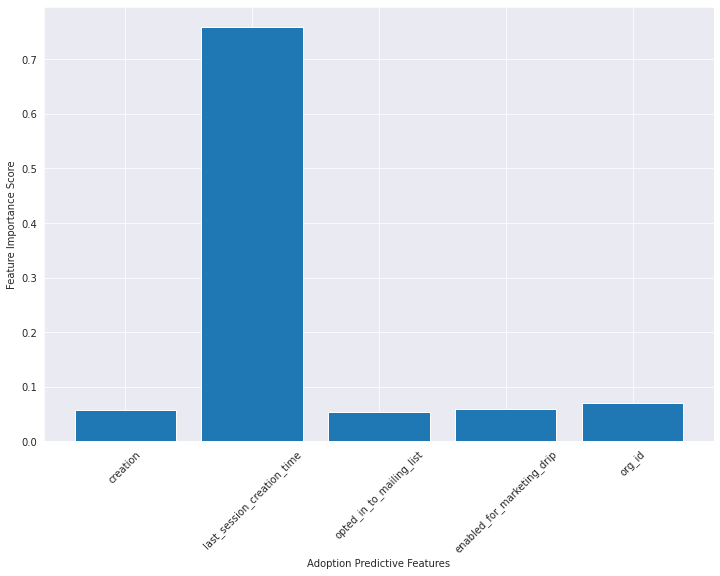

In [ ]:
feat_imp = model.feature_importances_
sns.set_style("darkgrid")
plt.figure(figsize=(12,8))
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
xcol = X.columns
plt.xlabel('Adoption Predictive Features')
plt.ylabel('Feature Importance Score')
plt.xticks(range(len(xcol)), xcol.values, rotation=45)
plt.show()

In [ ]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 91.64%


Above model predicting whether a user will be an adopted user in the future and that the two most important features to determine adoption are the last login times of a user and the organization the users belong to.
